<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 Unconstrained Optimization



---



Key Concepts:


*   Necessary and Sufficient Conditions of Local Minimizers
*   Convexity and Global Minimizers
*   Gradient Descent

#### Set up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



---



###Necessary and Sufficient Conditions of Local Minimizers

In unconstrained optimization problems, the aim is to find a point $ x^* \in \mathbb{R}^d $ that minimizes a function $ f : \mathbb{R}^d \to \mathbb{R} $.
<br><br>
**Definition 3.3.1 (Global Minimizer)**  
A point $ x^* \in \mathbb{R}^d $ is a **global minimizer** if:
$$
f(x) \geq f(x^*) \quad \forall x \in \mathbb{R}^d.
$$

<br><br>
**Definition 3.3.2 (Local Minimizer)**  
A point $ x^* \in \mathbb{R}^d $ is a **local minimizer** if there exists a $ \delta > 0 $ such that:
$$
f(x) \geq f(x^*) \quad \forall x \in B_\delta(x^*) \setminus \{x^*\},
$$
where $ B_\delta(x^*) $ is the open $ \delta $-ball around $ x^* $.

<br><br>
**Definition 3.3.3 (Descent Direction)**  
A vector $ v $ is a **descent direction** for $ f $ at $ x_0 $ if there exists an $ \alpha^* > 0 $ such that:
$$
f(x_0 + \alpha v) < f(x_0) \quad \forall \alpha \in (0, \alpha^*).
$$

<br><br>
**Theorem 3.3.6 (First-Order Necessary Condition)**  
If $ f $ is continuously differentiable and $ x_0 $ is a local minimizer, then:
$$
\nabla f(x_0) = 0.
$$

<br><br>
**Theorem 3.3.8 (Second-Order Necessary Condition)**  
If $ f $ is twice continuously differentiable and $ x_0 $ is a local minimizer, then the Hessian matrix $ H_f(x_0) $ is positive semi-definite:
$$
x^T H_f(x_0) x \geq 0 \quad \forall x \in \mathbb{R}^d.
$$

<br><br>
**Theorem 3.3.10 (Second-Order Sufficient Condition)**  
If $ f $ is twice continuously differentiable, $ \nabla f(x_0) = 0 $, and $ H_f(x_0) $ is positive definite, then $ x_0 $ is a **strict local minimizer**:
$$
v^T H_f(x_0) v > 0 \quad \forall v \neq 0.
$$


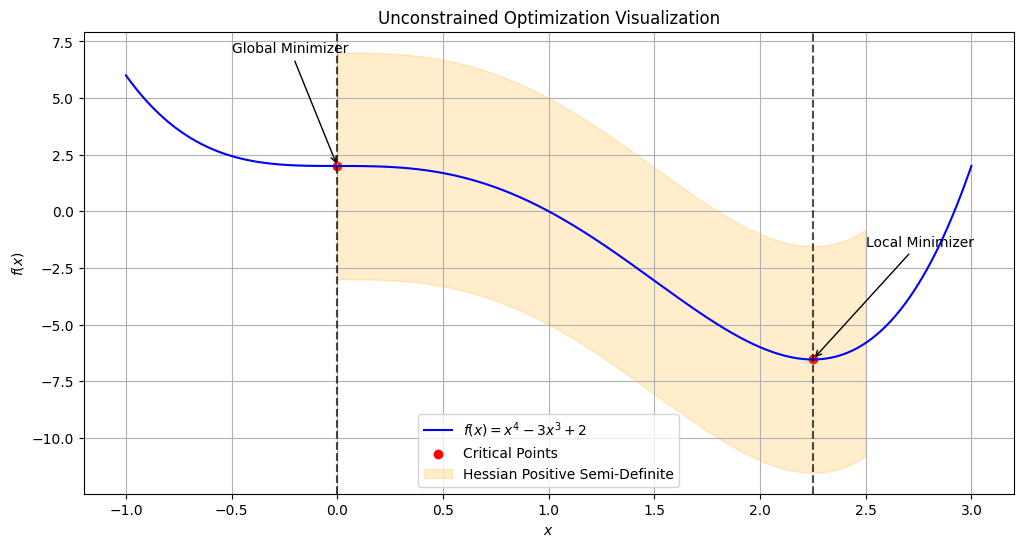

In [14]:
# Define the function and derivatives
def f(x):
    return x**4 - 3*x**3 + 2

def df(x):
    return 4*x**3 - 9*x**2

def ddf(x):
    return 12*x**2 - 18*x

# X values for plotting
x = np.linspace(-1, 3, 400)
y = f(x)

# Critical points
critical_points = np.array([0, 2.25])
local_min = 2.25
global_min = 0

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='$f(x) = x^4 - 3x^3 + 2$', color='b')
plt.scatter(critical_points, f(critical_points), color='r', label='Critical Points')

# Global minimizer
plt.annotate('Global Minimizer', (global_min, f(global_min)),
             xytext=(-0.5, f(global_min) + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Local minimizer
plt.annotate('Local Minimizer', (local_min, f(local_min)),
             xytext=(2.5, f(local_min) + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# First-Order Necessary Condition
plt.axvline(x=global_min, linestyle='--', color='k', alpha=0.7)
plt.axvline(x=local_min, linestyle='--', color='k', alpha=0.7)

# Second-Order Conditions
fill_region = np.linspace(0, 2.5, 100)
plt.fill_between(fill_region, f(fill_region) - 5,
                 f(fill_region) + 5, color='orange', alpha=0.2, label='Hessian Positive Semi-Definite')


plt.title('Unconstrained Optimization Visualization')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()


###Convexity and Global Minimizers



Convexity plays a role in determining whether local minimizers are also global minimizers
<br><br>
**Definition 3.3.11 (Convex Set)**  
A set $ D \subseteq \mathbb{R}^d $ is **convex** if for all $ x, y \in D $ and all $ \alpha \in [0,1] $:
$$
(1 - \alpha) x + \alpha y \in D.
$$
<br><br>
**Definition 3.3.13 (Convex Function)**  
A function $ f : \mathbb{R}^d \to \mathbb{R} $ is **convex** if, for all $ x, y \in \mathbb{R}^d $ and all $ \alpha \in [0,1] $:
$$
f((1 - \alpha)x + \alpha y) \leq (1 - \alpha)f(x) + \alpha f(y).
$$
<br><br>
**Lemma 3.3.15 (First-Order Convexity Condition)**  
Let $ f : \mathbb{R}^d \to \mathbb{R} $ be continuously differentiable. Then, $ f $ is convex if and only if for all $ x, y \in \mathbb{R}^d $:
$$
f(y) \geq f(x) + \nabla f(x)^T (y - x).
$$
<br><br>
**Lemma 3.3.16 (Second-Order Convexity Condition)**  
Let $ f : \mathbb{R}^d \to \mathbb{R} $ be twice continuously differentiable. Then, $ f $ is convex if and only if the Hessian matrix $ H_f(x) $ is positive semi-definite for all $ x \in \mathbb{R}^d $:
$$
x^T H_f(x) x \geq 0 \quad \forall x \in \mathbb{R}^d.
$$
<br><br>
**Theorem 3.3.18 (Global Minimizer of a Convex Function)**  
Let $ f : \mathbb{R}^d \to \mathbb{R} $ be a continuously differentiable, convex function. If $ \nabla f(x_0) = 0 $, then $ x_0 $ is a global minimizer:
$$
f(y) \geq f(x_0) \quad \forall y \in \mathbb{R}^d.
$$
<br><br>
**Theorem 3.3.19 (Global Minimizers of Convex Functions)**  
Let $ f : \mathbb{R}^d \to \mathbb{R} $ be a convex function. Then any local minimizer of $ f $ is also a global minimizer.



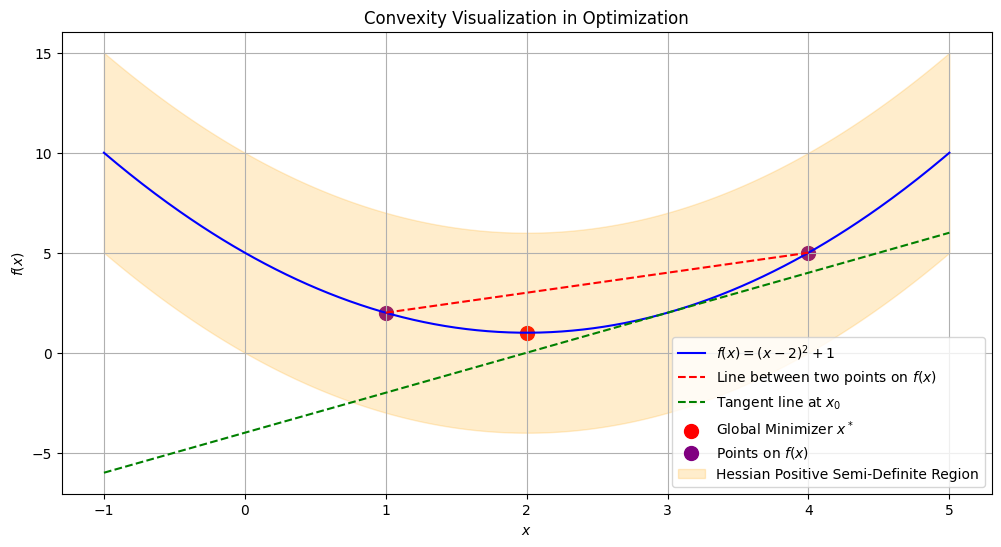

In [13]:
# Convex function and its derivative
def f(x):
    return (x - 2)**2 + 1

def df(x):
    return 2 * (x - 2)

def ddf(x):
    return np.full_like(x, 2)

# Create x values
x = np.linspace(-1, 5, 400)
y = f(x)

# Plot convex function
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='$f(x) = (x - 2)^2 + 1$', color='b')
x1, x2 = 1, 4
y1, y2 = f(x1), f(x2)
plt.plot([x1, x2], [y1, y2], 'r--', label='Line between two points on $f(x)$')

# First-order convexity condition
x0 = 3
y0 = f(x0)
slope = df(x0)
tangent_line = y0 + slope * (x - x0)
plt.plot(x, tangent_line, 'g--', label='Tangent line at $x_0$')

# Global minimizer
global_min = 2
plt.scatter(global_min, f(global_min), color='r', s=100, label='Global Minimizer $x^*$')

# Points used for the convexity line test
plt.scatter([x1, x2], [y1, y2], color='purple', s=100, label='Points on $f(x)$')

# Second-order condition
plt.fill_between(x, y - 5, y + 5, where=(ddf(x) >= 0), color='orange', alpha=0.2, label='Hessian Positive Semi-Definite Region')

plt.title('Convexity Visualization in Optimization')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()


###Gradient Descent

Gradient descent is an iterative optimization algorithm used to find a local minimum of a differentiable function
<br><br>
**Definition 3.3.21 (Steepest Descent)**  
The **steepest descent** direction for a differentiable function $ f : \mathbb{R}^d \to \mathbb{R} $ at a point $ x_0 $ is given by:
$$
v^* = -\frac{\nabla f(x_0)}{\|\nabla f(x_0)\|}.
$$
This direction minimizes the directional derivative of $ f $ at $ x_0 $.
<br><br>
**Theorem 3.3.23 (Gradient Descent Algorithm)**  
Let $ f : \mathbb{R}^d \to \mathbb{R} $ be continuously differentiable. The gradient descent algorithm generates a sequence of iterates $ \{x_k\} $ according to:
$$
x_{k+1} = x_k - \alpha_k \nabla f(x_k), \quad k = 0, 1, 2, \ldots,
$$
where $ \alpha_k > 0 $ is the step size at iteration $ k $. If $ \nabla f(x_k) \neq 0 $, then:
$$
f(x_{k+1}) \leq f(x_k), \quad \forall k \geq 1.
$$
<br><br>
**Step Size Selection**  
In gradient descent, the step size $ \alpha_k $ can be chosen to minimize the function value along the direction of the gradient:
$$
\alpha_k = \arg \min_{\alpha > 0} f(x_k - \alpha \nabla f(x_k)).
$$


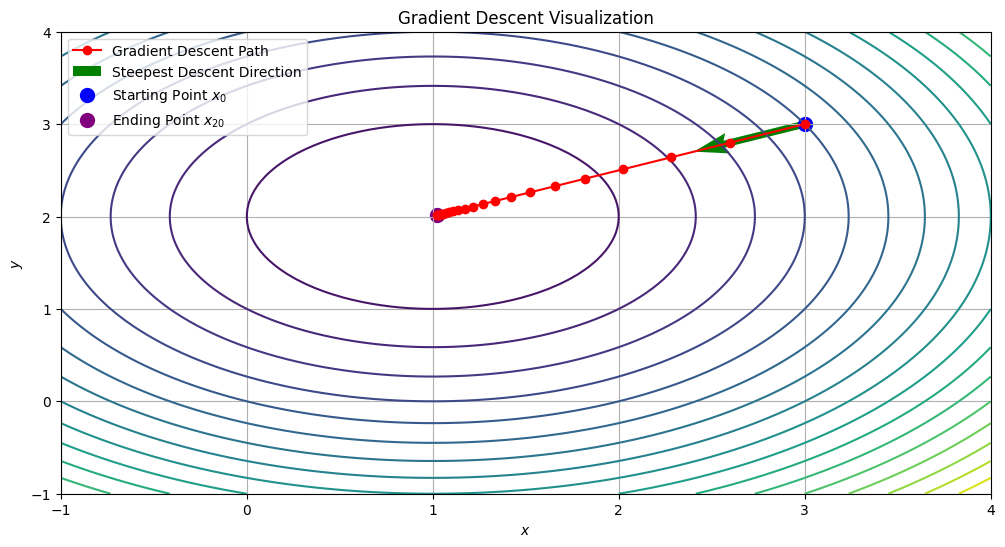

In [12]:
# Quadratic function and gradient
def f(x, y):
    return (x - 1)**2 + (y - 2)**2

def grad_f(x, y):
    df_dx = 2 * (x - 1)
    df_dy = 2 * (y - 2)
    return np.array([df_dx, df_dy])

# Gradient descent parameters
alpha = 0.1
num_iterations = 20
x0 = np.array([3.0, 3.0])

# Perform gradient descent
points = [x0]
for _ in range(num_iterations):
    grad = grad_f(*points[-1])
    next_point = points[-1] - alpha * grad
    points.append(next_point)

points = np.array(points)
x = np.linspace(-1, 4, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Contour and gradient descent path
plt.figure(figsize=(12, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(points[:, 0], points[:, 1], 'r-o', label='Gradient Descent Path')

# Plot
v_star = -grad_f(*x0) / np.linalg.norm(grad_f(*x0))
plt.quiver(x0[0], x0[1], v_star[0], v_star[1], angles='xy', scale_units='xy', scale=1.5, color='g', label='Steepest Descent Direction')
plt.scatter(*x0, color='blue', s=100, label='Starting Point $x_0$')
plt.scatter(points[-1, 0], points[-1, 1], color='purple', s=100, label='Ending Point $x_{20}$')

plt.title('Gradient Descent Visualization')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()
